In [1]:
import matplotlib.pyplot as plt
import numpy as np
import arby

#autoreload permite que jupyter vea las modif de los script de forma automática
%load_ext autoreload
%autoreload 2

In [2]:
q_train = np.load("q_train_1d_seed=1.npy")
q_test = np.load("q_test_1d_seed=1.npy")
ts_train = np.load("ts_train_1d_seed=1.npy")
ts_test = np.load("ts_test_1d_seed=1.npy")
times = np.load("times_1d_seed=1.npy")

In [3]:
q_train

array([[1.        , 0.        , 0.        ],
       [8.        , 0.        , 0.        ],
       [4.58275137, 0.        , 0.        ],
       ...,
       [7.5072576 , 0.        , 0.        ],
       [7.11436191, 0.        , 0.        ],
       [1.94864703, 0.        , 0.        ]])

[8. 0. 0.]
[1.94864703 0.         0.        ]


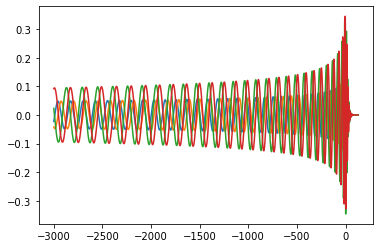

In [4]:
for idx in [1,-1]:
    print(q_train[idx])
    q_train[idx]
    plt.plot(times,np.imag(ts_train[idx]))
    plt.plot(times,np.real(ts_train[idx]));

CPU times: user 3.76 s, sys: 591 ms, total: 4.35 s
Wall time: 1.4 s


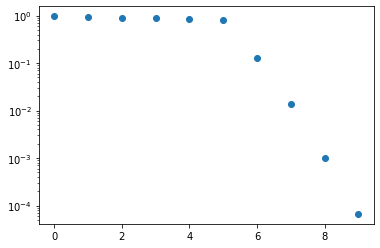

In [5]:
%%time
from skreducedmodel import ReducedModel

model = ReducedModel(
                     seed_global_rb = 0,
                     greedy_tol = 1e-16,
                     lmax = 1, 
                     nmax = 10,
                     normalize = True
                     )

rb = model.fit(
               training_set = ts_train, 
               parameters = q_train, 
               physical_points = times,
               )

len(rb.indices),rb.indices,

plt.yscale("log")
plt.plot(rb.errors,"o")

In [6]:
model.greedy_tol,model.normalize,model.regression_method

(1e-16, True, None)

In [7]:
rb.basis.integration.rule

'riemann'

In [8]:
len(rb.indices),rb.indices,rb.errors

(10,
 [0, 66, 357, 251, 107, 1, 109, 281, 459, 332],
 array([9.71144462e-01, 9.29887628e-01, 8.87487769e-01, 8.73268169e-01,
        8.47193863e-01, 8.20994075e-01, 1.27733997e-01, 1.40122878e-02,
        1.00016899e-03, 6.64974391e-05]))

------

In [9]:
%%time
arby_model = arby.reduced_basis(ts_train, times, greedy_tol=1e-16, normalize=True)

arby_model.errors,len(arby_model.errors)

CPU times: user 7 s, sys: 869 ms, total: 7.87 s
Wall time: 2.3 s


(array([9.71144462e-01, 9.29887628e-01, 8.87487769e-01, 8.73268169e-01,
        8.47193863e-01, 8.20994075e-01, 1.27733997e-01, 1.40122878e-02,
        1.00016899e-03, 6.64974391e-05, 3.50646812e-06, 1.96794915e-07,
        5.29893675e-08, 5.98261392e-09, 1.60607923e-10, 1.68110104e-11,
        3.63503172e-12, 1.83832902e-13, 2.69249134e-14, 7.13741463e-15,
        5.99520433e-15]),
 21)

In [10]:
arby_model.errors[0] == rb.errors[0]

True

In [84]:
def normalize_set(array,domain,rule = "riemann"):
    integration = arby.integrals.Integration(domain, rule)
    norms = integration.norm(array)
    return np.array(
            [
                h if np.allclose(h, 0, atol=1e-15) else h / norms[i]
                for i, h in enumerate(array)
            ]
        )

#normalize with arby code
normalized_ts_train = normalize_set(ts_train,times)
#del ts_train
normalized_ts_test = normalize_set(ts_test,times)
#del ts_test

print(times.shape)
print(q_train.shape,normalized_ts_train.shape)
print(q_test.shape,normalized_ts_test.shape)

(31300,)
(500, 3) (500, 31300)
(500, 3) (500, 31300)


In [17]:
greedy_tol = 1e-16
normalize = True
model = Surrogate()

results = {}
for lmax in range(0,1):
    for nmax in [20,np.inf]:
        
        model.fit(ts_train, q_train, times, greedy_tol, nmax, lmax, normalize)
        
        errors = []
        for q, wf in zip(q_test, ts_test):
            error = np.real(hpg_norm.proj_error_hpgreedy(tree, q, wf/hpg_norm.norm_riemann(wf,dt=0.1), N))
            errors.append(error)

        results[(L_max,N_max)] = {}
        results[(L_max,N_max)]["max_errors"] = np.max(errors)
        results[(L_max,N_max)]["mean_errors"] = np.mean(errors)
        print(f"N_max = {N_max}, L_max = {L_max}. max error = {max_errors[-1]}")

NameError: name 'hpg_norm' is not defined